In [179]:
import numpy as np
import pandas as pd
import datetime as dt
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import itertools

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [180]:
file_path = 'D:/Academics/Data Science/AnalytixLabs/Python/Case Studies/Python Foundation End to End Case Study E-Commerce Analytics Project/'

In [181]:
customers = pd.read_csv(file_path + 'CUSTOMERS.csv').drop_duplicates(keep='first')
sellers = pd.read_csv(file_path + 'SELLERS.csv').drop_duplicates(keep='first')
products = pd.read_csv(file_path + 'PRODUCTS.csv').drop_duplicates(keep='first')
orders = pd.read_csv(file_path + 'ORDERS.csv').drop_duplicates(keep='first')
ord_item = pd.read_csv(file_path + 'ORDER_ITEMS.csv').drop_duplicates(keep='first')
ord_pay = pd.read_csv(file_path + 'ORDER_PAYMENTS.csv').drop_duplicates(keep='first')
ord_rvw_rating = pd.read_csv(file_path + 'ORDER_REVIEW_RATINGS.csv').drop_duplicates(keep='first')
geo_loc = pd.read_csv(file_path + 'GEO_LOCATION.csv').drop_duplicates(keep='first')

## Data audit

In [182]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [183]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


In [184]:
# changing date columns to proper format
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp, format='%m/%d/%Y %H:%M')
orders.order_approved_at = pd.to_datetime(orders.order_approved_at, format='%m/%d/%Y %H:%M')
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date, format='%m/%d/%Y %H:%M')
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date, format='%m/%d/%Y %H:%M')
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date, format='%m/%d/%Y %H:%M')

In [185]:
ord_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [186]:
ord_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB


In [187]:
# changing date columns to proper format
ord_item.shipping_limit_date = pd.to_datetime(ord_item.shipping_limit_date, format='%m/%d/%Y %H:%M')

In [188]:
ord_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [189]:
ord_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [190]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [191]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [192]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [193]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.6+ MB


In [194]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [195]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 120.9+ KB


In [196]:
ord_rvw_rating.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [197]:
ord_rvw_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.6+ MB


In [198]:
# changing date columns to proper format
ord_rvw_rating.review_creation_date = pd.to_datetime(ord_rvw_rating.review_creation_date, format='%m/%d/%Y %H:%M')
ord_rvw_rating.review_answer_timestamp = pd.to_datetime(ord_rvw_rating.review_answer_timestamp, format='%m/%d/%Y %H:%M')

In [199]:
geo_loc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [200]:
geo_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 891.3+ KB


In [201]:
ecom = pd.merge(left=orders, right=ord_item, on='order_id', how='inner')
ecom = pd.merge(left=ecom, right=products, on='product_id', how='inner')
ecom = pd.merge(left=ecom, right=ord_pay, on='order_id', how='inner')
ecom = pd.merge(left=ecom, right=ord_rvw_rating, on='order_id', how='inner')
ecom = pd.merge(left=ecom, right=customers, on='customer_id', how='inner')
ecom = pd.merge(left=ecom, right=sellers, on='seller_id', how='inner')
ecom = pd.merge(left=ecom, right=geo_loc, how='inner',
                left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
ecom = pd.merge(left=ecom, right=geo_loc, how='inner', suffixes=('_cust','_seller'),
                left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
ecom

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_cust,geolocation_lat_cust,geolocation_lng_cust,geolocation_city_cust,geolocation_state_cust,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,9350,Chhuikhadan,Chhattisgarh,3149,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,9350,Chhuikhadan,Chhattisgarh,3149,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,9350,Chhuikhadan,Chhattisgarh,3149,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-17 15:28:00,2017-08-18 14:44:00,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:00,29.99,7.78,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-19,2017-08-20 15:16:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,Akkarampalle,Andhra Pradesh,9350,Chhuikhadan,Chhattisgarh,3366,-23.565578,-46.534603,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,2017-08-02 18:43:00,2017-08-04 17:35:00,2017-08-07 18:30:00,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:00,29.99,7.78,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,2017-08-08,2017-08-08 23:26:00,ef0996a1a279c26e7ecbd737be23d235,2290,Akkarampalle,Andhra Pradesh,9350,Chhuikhadan,Chhattisgarh,2290,-23.543295,-46.630743,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [202]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117734 entries, 0 to 117733
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   order_id                            117734 non-null  object        
 1   customer_id                         117734 non-null  object        
 2   order_status                        117734 non-null  object        
 3   order_purchase_timestamp            117734 non-null  datetime64[ns]
 4   order_approved_at                   117719 non-null  datetime64[ns]
 5   order_delivered_carrier_date        116491 non-null  datetime64[ns]
 6   order_delivered_customer_date       115164 non-null  datetime64[ns]
 7   order_estimated_delivery_date       117734 non-null  datetime64[ns]
 8   order_item_id                       117734 non-null  int64         
 9   product_id                          117734 non-null  object        
 10  seller_i

### 1.a) Define & calculate high level metrics
#### (i) Total Revenue generated
Total revenue generated per year is the total sales value of delivered products per year

In [203]:
tot_revenue = ecom.drop_duplicates(subset=['order_id','order_status','order_purchase_timestamp',
                                           'payment_sequential','payment_value'], keep='first')
ord_status = ['delivered','invoiced','shipped','approved']
tot_revenue.loc[tot_revenue.order_status.isin(ord_status) , :] \
           .groupby(by=[tot_revenue.order_purchase_timestamp.dt.year]).agg({'payment_value':'sum'}) \
           .rename(columns={'payment_value':'total_revenue'})

,total_revenue
order_purchase_timestamp,
2016,51173.80
2017,6994521.97
2018,8549095.53


#### (ii) Total sales quantity
Total sales quantity is the total number of products delivered in each year

In [204]:
tot_qty_sal = ecom.drop_duplicates(subset=['order_id','order_status','order_purchase_timestamp',
                                           'product_id','order_item_id'], keep='first')
ord_status = ['delivered','invoiced','shipped','approved']
tot_qty_sal.loc[tot_qty_sal.order_status.isin(ord_status) , :] \
           .groupby(tot_qty_sal.order_purchase_timestamp.dt.year).agg({'product_id':'count'}) \
           .rename(columns={'product_id':'total_sales_quantity'})

,total_sales_quantity
order_purchase_timestamp,
2016,343
2017,50064
2018,60787


#### (iii) Total products & product categories
Total count of products & product categories available and ordered

In [205]:
print('Total count of unique products sold :', ecom.product_id.nunique())
print('Total count of unique product categories sold :', ecom.product_category_name.nunique())

Total count of unique products sold : 32842
Total count of unique product categories sold : 71


#### (iv) Total sellers
Total count of sellers on the platform

In [206]:
print('Total count of sellers on the platform :', ecom.seller_id.nunique())

Total count of sellers on the platform : 3088


#### (v) Total locations
Number of locations where the online platform is active

In [207]:
print('Number of cities where the online platform is active :',
      pd.concat([ecom.customer_city, ecom.seller_city], axis=0).nunique())

Number of cities where the online platform is active : 4062


#### (vi) Total payment methods
Number of payment methods used for transactions

In [208]:
print('Types of payment methods used :')
print(pd.Series(ecom.payment_type.unique()), '\n')
print('Number of payment methods :', ecom.payment_type.nunique())

Types of payment methods used :
0    credit_card
1        voucher
2            UPI
3     debit_card
dtype: object 

Number of payment methods : 4


### 1.b) How many new customers are acquired every month

In [209]:
# creating a set of all customer IDs in each month
cust_id = ecom.groupby(pd.Grouper(key='order_purchase_timestamp', freq='MS')) \
              .apply(lambda x: set(x.customer_unique_id)).reset_index() \
              .rename(columns={0:'cust_id_set'})
cust_id['cust_count'] = cust_id.cust_id_set.apply(lambda x: len(x))

# following function returns new customer IDs set, count and retained customer IDs set, count in a given month
def f_cust(x):
    set1 = set()
    year= x.order_purchase_timestamp.year
    month= x.order_purchase_timestamp.month
    for index in cust_id.index:
        if(cust_id.loc[index,'order_purchase_timestamp'].year < year) | \
          ((cust_id.loc[index,'order_purchase_timestamp'].year == year) & \
           (cust_id.loc[index,'order_purchase_timestamp'].month < month)):
                set1.update(cust_id.loc[index,'cust_id_set'])   # creating a union set of all cust ids of previous months
    return(pd.Series([x.cust_id_set.difference(set1), len(x.cust_id_set.difference(set1)),
                      x.cust_id_set.intersection(set1), len(x.cust_id_set.intersection(set1))],
                     index=(['new_cust_id','new_cust_count','retained_cust_id','retained_cust_count'])))     # new cust id set and count after subtracting all cust ids of prev months

new_cust = cust_id.apply(f_cust, axis=1)
new_cust = pd.concat([cust_id, new_cust], axis=1) 
new_cust

,order_purchase_timestamp,cust_id_set,cust_count,new_cust_id,new_cust_count,retained_cust_id,retained_cust_count
0,2016-09-01,"{b7d76e111c89f7ebf14761390f0f7d17, 4854e9b3fef...",2,"{b7d76e111c89f7ebf14761390f0f7d17, 4854e9b3fef...",2,{},0
1,2016-10-01,"{d93a22bb52bb2f41a7267b8a02370781, 95c47b01636...",305,"{d93a22bb52bb2f41a7267b8a02370781, e3299196e14...",305,{},0
2,2016-11-01,{},0,{},0,{},0
3,2016-12-01,{f7b981e8a280e455ac3cbe0d5d171bd1},1,{f7b981e8a280e455ac3cbe0d5d171bd1},1,{},0
4,2017-01-01,"{c0ffced3ebdad307fbf1bff6b9f65bca, 48368b31672...",755,"{c0ffced3ebdad307fbf1bff6b9f65bca, 48368b31672...",754,{f7b981e8a280e455ac3cbe0d5d171bd1},1
5,2017-02-01,"{c62ccb7adc9ea2a094c7c8eabb03442d, a328b878160...",1707,"{c62ccb7adc9ea2a094c7c8eabb03442d, a328b878160...",1704,"{5c82413b70d65c90e4f9e465c303fc82, c76762dfb64...",3
6,2017-03-01,"{3b81cc8417be691f3159596da7e08a3c, 985f1ef1d05...",2590,"{3b81cc8417be691f3159596da7e08a3c, 1b2612a1eb1...",2584,"{e23daf58ce481f3d38066e654ef610cb, bc2387c4842...",6
7,2017-04-01,"{06f32fb3e14b969d0e991af7d08818db, 574bbaf52ff...",2345,"{06f32fb3e14b969d0e991af7d08818db, 574bbaf52ff...",2325,"{e5bdbd18812e42788e7cbad7058fc0ab, c51a1ea9fa9...",20
8,2017-05-01,"{19f5169a88039aec61a15afe2b1b4e65, 3839e1a64b6...",3571,"{19f5169a88039aec61a15afe2b1b4e65, 3839e1a64b6...",3544,"{c4fe9fc8b5e1b4f9992db983d0429854, 355ae139c8a...",27
9,2017-06-01,"{5408b524d4f3a4ac4e9b7b52d993fae7, 22723409a57...",3133,"{5408b524d4f3a4ac4e9b7b52d993fae7, 22723409a57...",3093,"{87a7c3090f96d9da963125a0d7f8193a, 63cfc61cee1...",40


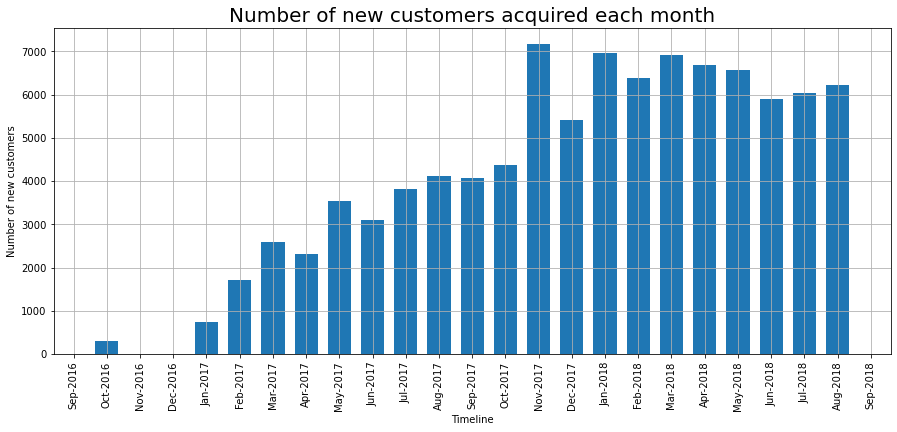

In [210]:
# plotting new customer count
new_cust_plot = new_cust.set_index(keys='order_purchase_timestamp')
ax = new_cust_plot.plot(kind='bar', y='new_cust_count', width=0.7, figsize=(15,6), legend=None)
x_ticks = new_cust_plot.index.strftime('%b-%Y')
ax.set_xticklabels(x_ticks)
plt.xlabel('Timeline')
plt.ylabel('Number of new customers')
plt.title('Number of new customers acquired each month', fontsize=20)
plt.grid()
plt.show()

### 1.c) Number of customers retained on month on month basis

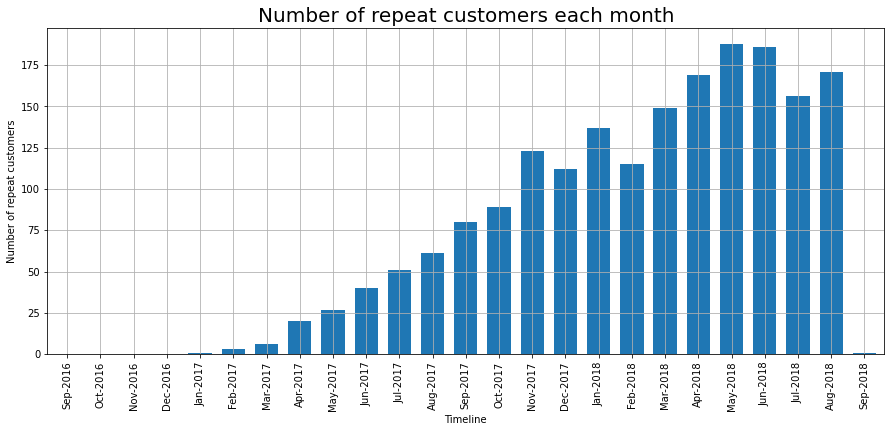

In [211]:
# plotting
new_cust_plot = new_cust.set_index(keys='order_purchase_timestamp')
ax = new_cust_plot.plot(kind='bar', y='retained_cust_count', width=0.7, figsize=(15,6), legend=None, color='tab:blue')
x_ticks = new_cust_plot.index.strftime('%b-%Y')
ax.set_xticklabels(x_ticks)
plt.xlabel('Timeline')
plt.ylabel('Number of repeat customers')
plt.title('Number of repeat customers each month', fontsize=20)
plt.grid()
plt.show()

### 1.d) Revenues from existing/new customers on month on month basis

In [212]:
revenue = ecom.drop_duplicates(subset=['order_id','order_status','order_purchase_timestamp','payment_sequential',
                                       'payment_value','customer_unique_id'], keep='first')
ord_status = ['delivered','invoiced','shipped','approved']
newcust_rev = pd.DataFrame()  # dataframe to store order values from new customers
retainedcust_rev = pd.DataFrame()   # dataframe to store order values from retained customers

# following loop keeps concatenating new customers and retained customers order values appearing each month
for ind in new_cust.index :
    newcust_rev = pd.concat([newcust_rev ,
                revenue.loc[(revenue.order_status.isin(ord_status)) & \
                (revenue.order_purchase_timestamp.dt.year == new_cust.loc[ind,'order_purchase_timestamp'].year) & \
                (revenue.order_purchase_timestamp.dt.month == new_cust.loc[ind,'order_purchase_timestamp'].month) & \
                (revenue.customer_unique_id.isin(list(new_cust.loc[ind,'new_cust_id']))), :] ], axis=0)
    retainedcust_rev = pd.concat([retainedcust_rev ,
                    revenue.loc[(revenue.order_status.isin(ord_status)) & \
                    (revenue.order_purchase_timestamp.dt.year == new_cust.loc[ind,'order_purchase_timestamp'].year) & \
                    (revenue.order_purchase_timestamp.dt.month == new_cust.loc[ind,'order_purchase_timestamp'].month) & \
                    (revenue.customer_unique_id.isin(list(new_cust.loc[ind,'retained_cust_id']))), :] ], axis=0)

newcust_rev = newcust_rev.groupby(pd.Grouper(key='order_purchase_timestamp', freq='MS')) \
                    .agg({'payment_value':'sum'}).reset_index().rename(columns={'payment_value':'new_cust_revenue'})
retainedcust_rev = retainedcust_rev.groupby(pd.Grouper(key='order_purchase_timestamp', freq='MS')) \
                    .agg({'payment_value':'sum'}).reset_index().rename(columns={'payment_value':'retained_cust_revenue'})
cust_revenue = pd.merge(left=new_cust, right=newcust_rev, on='order_purchase_timestamp', how='left')
cust_revenue = pd.merge(left=cust_revenue, right=retainedcust_rev, on='order_purchase_timestamp', how='left')
cust_revenue.fillna(0, inplace=True)
cust_revenue.loc[:,['order_purchase_timestamp','new_cust_revenue','retained_cust_revenue']]

,order_purchase_timestamp,new_cust_revenue,retained_cust_revenue
0,2016-09-01,136.23,0.00
1,2016-10-01,51017.95,0.00
2,2016-11-01,0.00,0.00
3,2016-12-01,19.62,0.00
4,2017-01-01,134472.05,19.62
5,2017-02-01,276713.03,170.83
6,2017-03-01,417724.35,650.82
7,2017-04-01,395891.31,2566.60
8,2017-05-01,571054.19,4975.30
9,2017-06-01,487308.27,5981.11


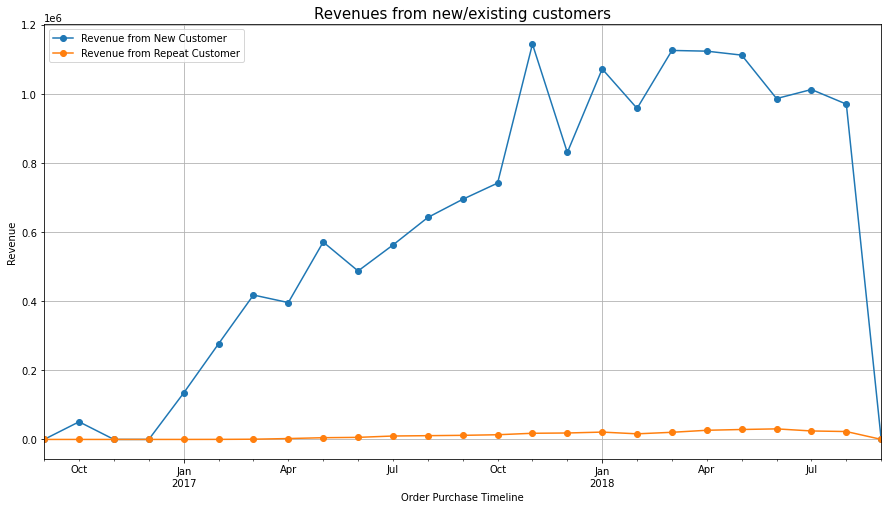

In [213]:
# plotting
cust_revenue_plot = cust_revenue.loc[:,['order_purchase_timestamp','new_cust_revenue','retained_cust_revenue']] \
                                .set_index('order_purchase_timestamp')
ax = cust_revenue_plot.plot(kind='line', marker='o', figsize=(15,8))

plt.xlabel('Order Purchase Timeline')
plt.ylabel('Revenue')
plt.legend(['Revenue from New Customer','Revenue from Repeat Customer'])
plt.title('Revenues from new/existing customers', fontsize=15)
plt.grid()
plt.show()

### 1.e) (i)  The trends/seasonality of sales, quantity by category

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\1888646353.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticks)


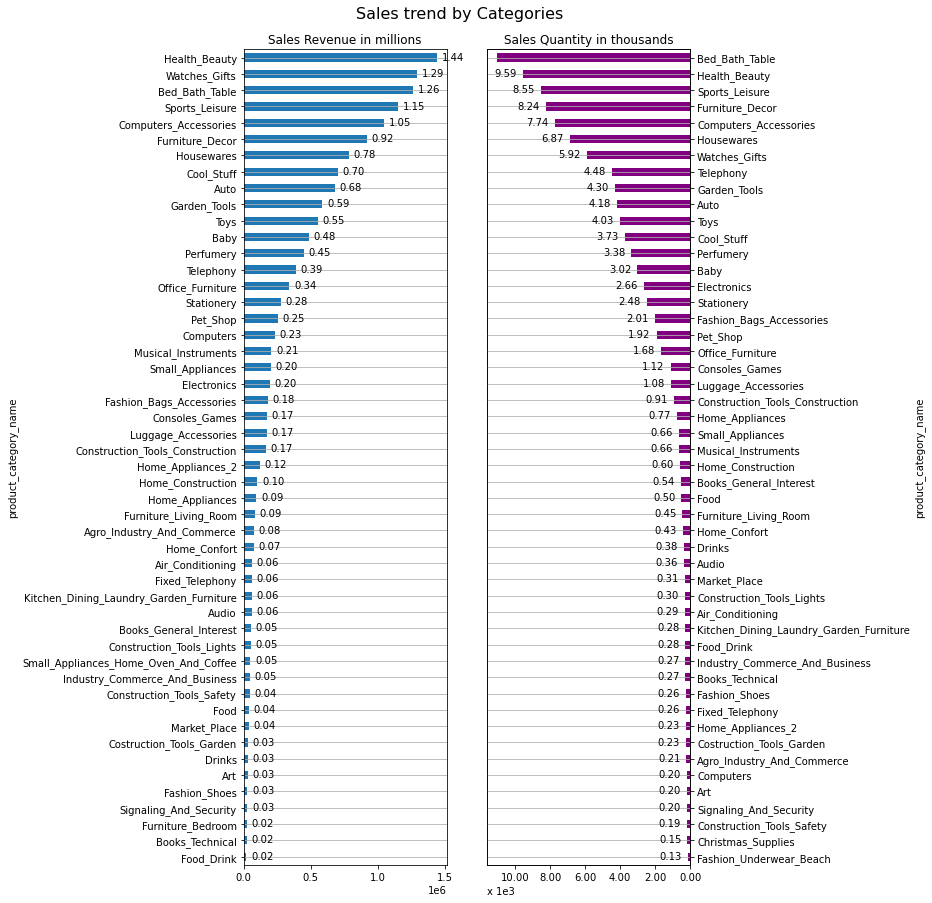

In [214]:
ord_status = ['delivered','invoiced','shipped','approved']
sales_trend = ecom.loc[ecom.order_status.isin(ord_status),
                       ['order_id','order_status','order_purchase_timestamp','payment_sequential',
                        'payment_value','product_category_name']].drop_duplicates()
quantity_trend = ecom.loc[ecom.order_status.isin(ord_status),
                         ['order_id','order_status','order_purchase_timestamp',
                          'order_item_id','product_category_name']].drop_duplicates()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,15))

sales_trend = sales_trend.groupby(by='product_category_name').agg({'payment_value':'sum'}) \
                .rename(columns={'payment_value':'sales'}).sort_values(by='sales', ascending=False).head(50)
sales_trend.sort_values(by='sales', ascending=True).plot(kind='barh', ax=axes[0])     # plotting top 50 products
axes[0].yaxis.grid(True)
for p in axes[0].patches:        # annotate barh plot
    axes[0].annotate(format(p.get_width()/1000000, '.2f'), 
                   (p.get_width()+50000 , p.get_y()), 
                   ha = 'center', va = 'center', 
                   xytext = (9, 5), 
                   textcoords = 'offset points')
axes[0].title.set_text('Sales Revenue in millions')
axes[0].get_legend().remove()

axes[1].invert_xaxis()
ax1 = axes[1].twinx()   # create twin x axis
axes[1].set_yticklabels([])   # deleting y ticks and labels from left side
axes[1].set_yticks([])
quantity_trend = quantity_trend.groupby(by='product_category_name').agg({'order_item_id':'count'}) \
                   .rename(columns={'order_item_id':'quantity'}).sort_values(by='quantity', ascending=False).head(50)
quantity_trend.sort_values(by='quantity', ascending=True).plot(kind='barh', ax=ax1, color='purple')   # plotting top 50 products
axes[1].set_xlabel('x 1e3', loc='left')
ax1.grid(True)      # annotate barh plot
for p in ax1.patches:
    ax1.annotate(format(p.get_width()/1000, '.2f'), 
                (p.get_width()+1500 , p.get_y()), 
                ha = 'center', va = 'center', 
                xytext = (9, 5), 
                textcoords = 'offset points')
ax1.title.set_text('Sales Quantity in thousands')
ax1.get_legend().remove()
xticks = [f'{x:,.2f}' for x in ax1.get_xticks()/1000]
ax1.set_xticklabels(xticks)
fig.suptitle('Sales trend by Categories', y=0.92, fontsize=16)   # y parameter to ajust vertical postion of title
plt.show()

### 1.e) (ii)  The trends/seasonality of sales, quantity by location

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\1060648575.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(y_ticks)


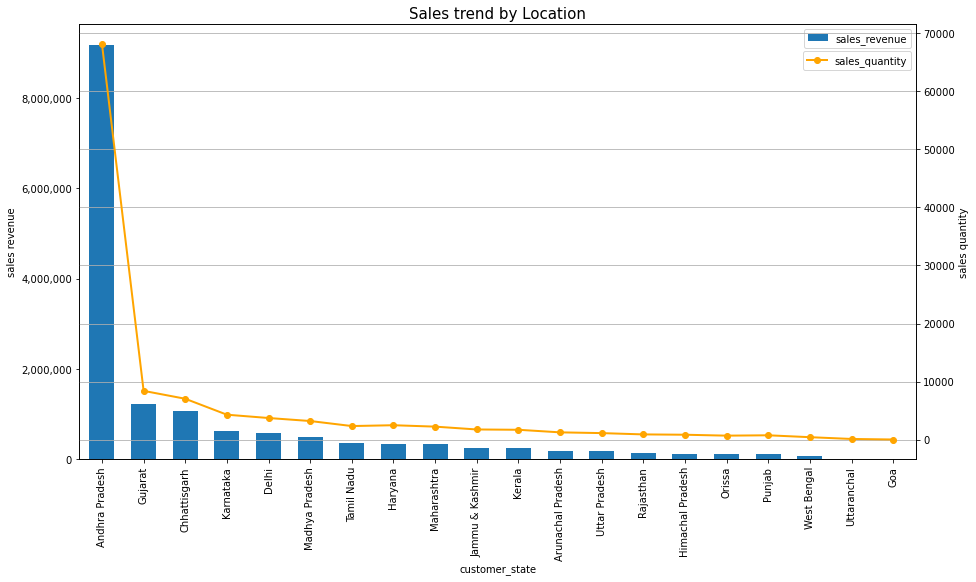

In [215]:
loc_rev = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp','payment_sequential',
                    'payment_value','customer_state']].drop_duplicates()
loc_qty = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp',
                    'order_item_id','customer_state']].drop_duplicates()
loc_rev = loc_rev.groupby(by='customer_state').agg({'payment_value':'sum'}) \
           .rename(columns={'payment_value':'sales_revenue'}).sort_values(by='sales_revenue', ascending=False)
loc_qty = loc_qty.groupby(by='customer_state').agg({'order_item_id':'count'}) \
           .rename(columns={'order_item_id':'sales_quantity'}).sort_values(by='sales_quantity', ascending=False)
loc_rev = pd.concat([loc_rev, loc_qty], axis=1)

fig, axes = plt.subplots(1,1, figsize=(15,8))
loc_rev.plot(kind='bar', y='sales_revenue', width=0.6 , ax=axes)
y_ticks = [f'{y:,.0f}' for y in axes.get_yticks()]
axes.set_yticklabels(y_ticks)
axes.set_ylabel('sales revenue')
axes.legend()

ax1=axes.twinx()
loc_rev.plot(kind='line', y='sales_quantity',
             ax=ax1, color='orange', marker='o', linewidth=2)
ax1.set_ylabel('sales quantity')
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
ax1.grid(True)

plt.title('Sales trend by Location', fontsize=15)
plt.show()

### 1.e) (iii) The trends/seasonality of sales, quantity by month

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\1421071031.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(y_ticks)


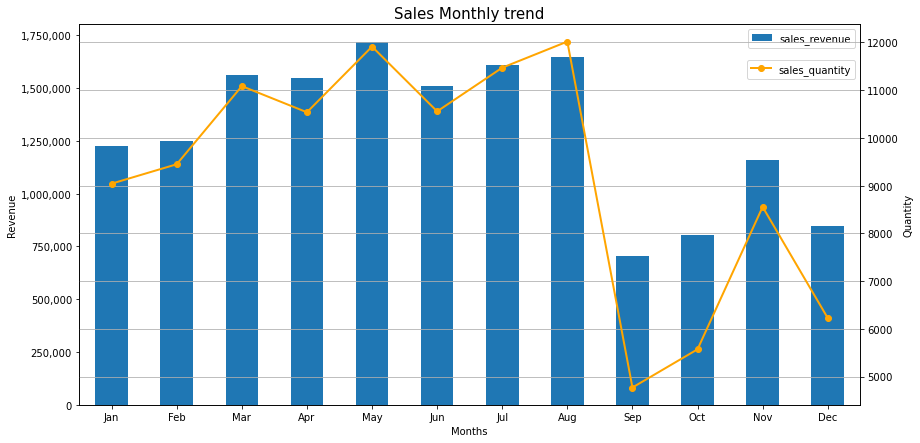

In [216]:
mon_rev = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp',
                    'payment_sequential','payment_value']].drop_duplicates()
mon_rev = mon_rev.groupby(mon_rev.order_purchase_timestamp.dt.month).agg({'payment_value':'sum'}) \
                 .rename(columns={'payment_value':'sales_revenue'})
mon_rev.index = [calendar.month_abbr[x] for x in mon_rev.index]
mon_rev.index.name = 'Months'

mon_qty = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp','order_item_id']].drop_duplicates()
mon_qty = mon_qty.groupby(mon_qty.order_purchase_timestamp.dt.month).agg({'order_id':'count'}) \
                 .rename(columns={'order_id':'sales_quantity'})
mon_qty.index = [calendar.month_abbr[x] for x in mon_qty.index]
mon_qty.index.name = 'Months'

fig, axes = plt.subplots(1,1, figsize=(14,7))
mon_rev.plot(kind='bar', rot=0, ax=axes)
y_ticks = [f'{y:,.0f}' for y in axes.get_yticks()]
axes.set_yticklabels(y_ticks)
axes.set_ylabel('Revenue')

ax1 = axes.twinx()
mon_qty.plot(kind='line', marker='o', ax=ax1, color='orange', linewidth=2)
ax1.set_ylabel('Quantity')
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.92))
ax1.grid(True)

plt.title('Sales Monthly trend', fontsize=15)
plt.show()

### 1.e) (iv) The trends/seasonality of sales, quantity by week

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\257625973.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_rev = week_rev.groupby(week_rev.order_purchase_timestamp.dt.week).agg({'payment_value':'sum'}) \
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\257625973.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_qty = week_qty.groupby(week_qty.order_purchase_timestamp.dt.week).agg({'order_id':'count'}) \
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\257625973.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(y_ticks)


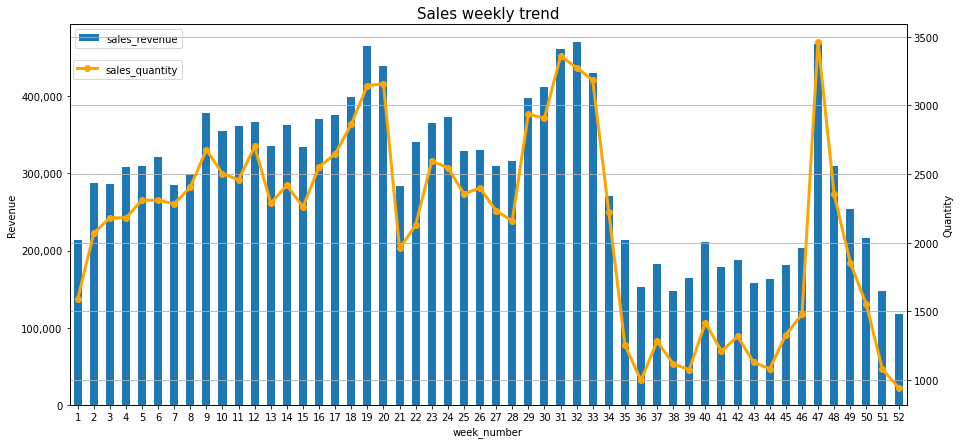

In [217]:
week_rev = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp',
                    'payment_sequential','payment_value']].drop_duplicates()
week_rev = week_rev.groupby(week_rev.order_purchase_timestamp.dt.week).agg({'payment_value':'sum'}) \
                 .rename(columns={'payment_value':'sales_revenue'})
week_rev.index.name = 'week_number'

week_qty = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp','order_item_id']].drop_duplicates()
week_qty = week_qty.groupby(week_qty.order_purchase_timestamp.dt.week).agg({'order_id':'count'}) \
                 .rename(columns={'order_id':'sales_quantity'})

fig, axes = plt.subplots(1,1, figsize=(15,7))
week_rev.plot(kind='bar', rot=0, ax=axes)
y_ticks = [f'{y:,.0f}' for y in axes.get_yticks()]
axes.set_yticklabels(y_ticks)
axes.set_ylabel('Revenue')

ax1 = axes.twinx()
ax1.plot(week_qty.index-1, week_qty.sales_quantity, marker='o',
         color='orange', linewidth=3, label='sales_quantity')
ax1.set_ylabel('Quantity')
ax1.legend( loc='upper right', bbox_to_anchor=(0.14, 0.92))
ax1.grid(True)

plt.title('Sales weekly trend', fontsize=15)
plt.show()

### 1.e) (v) The trends/seasonality of sales, quantity by day

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\753188240.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(y_ticks)


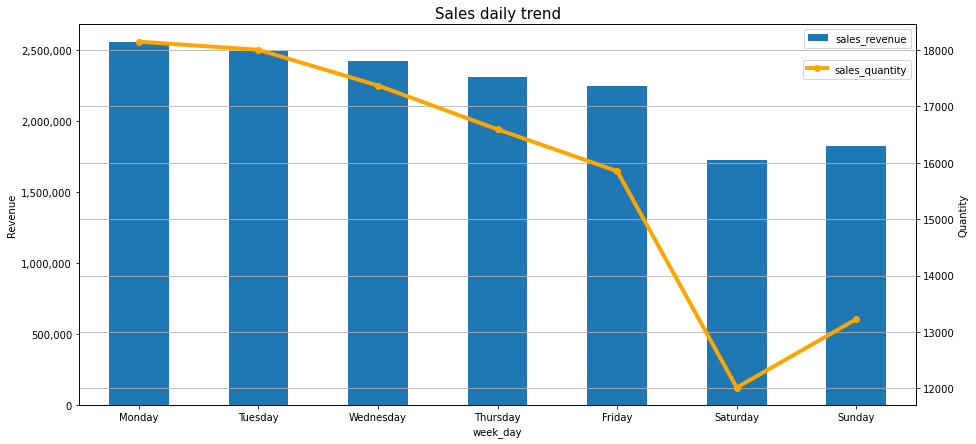

In [218]:
day_rev = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp',
                    'payment_sequential','payment_value']].drop_duplicates()
day_rev = day_rev.groupby(day_rev.order_purchase_timestamp.dt.strftime('%A')).agg({'payment_value':'sum'}) \
                 .rename(columns={'payment_value':'sales_revenue'}) \
                 .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
day_rev.index.name = 'week_day'

day_qty = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp','order_item_id']].drop_duplicates()
day_qty = day_qty.groupby(day_qty.order_purchase_timestamp.dt.strftime('%A')).agg({'order_id':'count'}) \
                 .rename(columns={'order_id':'sales_quantity'}) \
                 .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

fig, axes = plt.subplots(1,1, figsize=(15,7))
day_rev.plot(kind='bar', rot=0, ax=axes)
y_ticks = [f'{y:,.0f}' for y in axes.get_yticks()]
axes.set_yticklabels(y_ticks)
axes.set_ylabel('Revenue')

ax1 = axes.twinx()
day_qty.plot(kind='line', marker='o', ax=ax1, color='orange', linewidth=4)
ax1.set_ylabel('Quantity')
ax1.legend( bbox_to_anchor=(1, 0.92))
ax1.grid(True)

plt.title('Sales daily trend', fontsize=15)
plt.show()

### 1.e) (vi) The trends/seasonality of sales, quantity by time

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\60296.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(y_ticks)


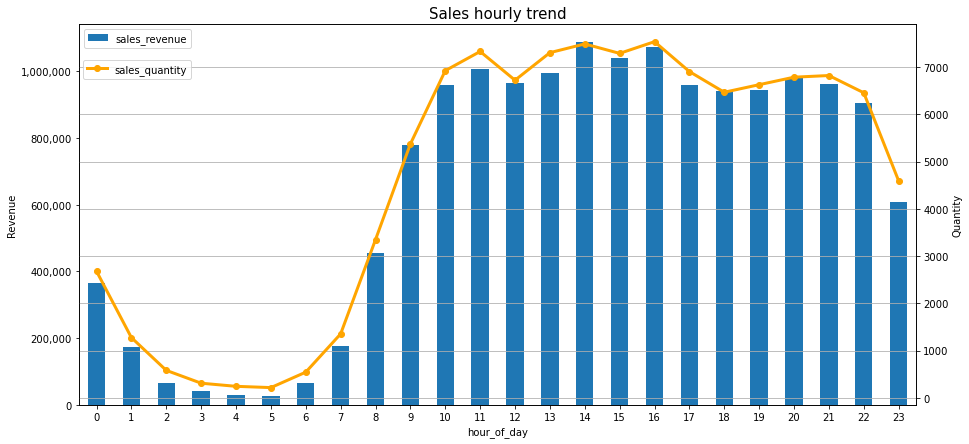

In [219]:
hour_rev = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp',
                    'payment_sequential','payment_value']].drop_duplicates()
hour_rev = hour_rev.groupby(hour_rev.order_purchase_timestamp.dt.hour).agg({'payment_value':'sum'}) \
                 .rename(columns={'payment_value':'sales_revenue'})
hour_rev.index.name = 'hour_of_day'

hour_qty = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp','order_item_id']].drop_duplicates()
hour_qty = hour_qty.groupby(hour_qty.order_purchase_timestamp.dt.hour).agg({'order_id':'count'}) \
                 .rename(columns={'order_id':'sales_quantity'})

fig, axes = plt.subplots(1,1, figsize=(15,7))
hour_rev.plot(kind='bar', rot=0, ax=axes)
y_ticks = [f'{y:,.0f}' for y in axes.get_yticks()]
axes.set_yticklabels(y_ticks)
axes.set_ylabel('Revenue')
axes.legend(bbox_to_anchor=(0.14, 1))

ax1 = axes.twinx()
hour_qty.plot(kind='line', marker='o', ax=ax1, color='orange', linewidth=3)
ax1.set_ylabel('Quantity')
ax1.legend(bbox_to_anchor=(0.14, 0.92))
ax1.grid(True)

plt.title('Sales hourly trend', fontsize=15)
plt.show()

### 1.e) (vii) The trends/seasonality of sales, quantity by payment method

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\3900889333.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(y_ticks)


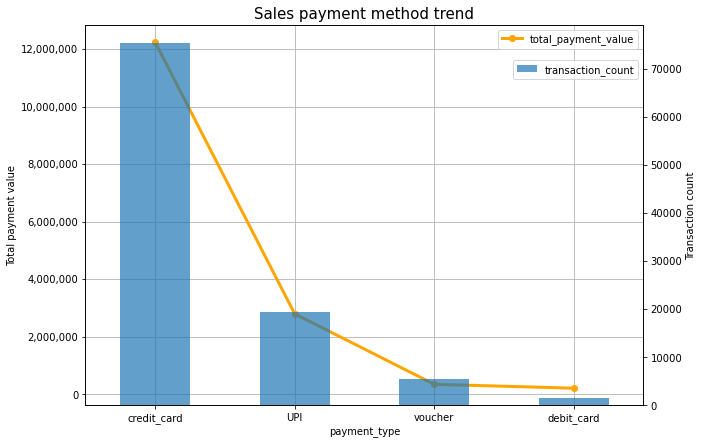

,total_payment_value,transaction_count
payment_type,,
credit_card,12239458.61,75289
UPI,2796085.28,19372
voucher,347574.21,5574
debit_card,211673.20,1511


In [220]:
pay_trend = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','order_purchase_timestamp','payment_sequential',
                    'payment_value','payment_type']].drop_duplicates()
pay_trend = pay_trend.groupby('payment_type').agg({'payment_value':['sum','count']}).droplevel(0, axis=1) \
                 .rename(columns={'sum':'total_payment_value', 'count':'transaction_count'}) \
                 .sort_values(by='transaction_count', ascending=False)

fig, axes = plt.subplots(1,1, figsize=(10,7))
ax1 = axes.twinx()

pay_trend.plot(kind='line', y='total_payment_value', marker='o', color='orange', linewidth=3, ax=axes)
y_ticks = [f'{y:,.0f}' for y in axes.get_yticks()]
axes.set_yticklabels(y_ticks)
axes.set_ylabel('Total payment value')
axes.grid(True)

pay_trend.plot(kind='bar', y='transaction_count', alpha=0.7, ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0.92))
ax1.set_ylabel('Transaction count')

plt.title('Sales payment method trend', fontsize=15)
plt.show()
pay_trend

### 1.f) (i) Popular products by month

In [221]:
pop_prod = ecom.loc[ecom.order_status.isin(ord_status),
                    ['order_id','order_status','order_purchase_timestamp',
                     'order_item_id','product_id']].drop_duplicates()

pop_prod = pop_prod.groupby(by=[pop_prod.order_purchase_timestamp.dt.month, 'product_id']) \
              .agg({'order_id':'count'}).reset_index() \
              .rename(columns={'order_id':'counts', 'order_purchase_timestamp':'month'})
pop_prod_month = pd.DataFrame()
for month in pop_prod.month.unique():
    temp_df = pop_prod.loc[pop_prod.month == month,:]
    pop_prod_month = pd.concat([pop_prod_month,
                                temp_df.loc[temp_df.counts == temp_df.counts.max(),:]],
                   axis=0)
pop_prod_month.set_index('month')

,product_id,counts
month,,
1,aca2eb7d00ea1a7b8ebd4e68314663af,122
2,e53e557d5a159f5aa2c5e995dfdf244b,71
3,aca2eb7d00ea1a7b8ebd4e68314663af,64
4,53b36df67ebb7c41585e8d54d6772e08,85
5,53b36df67ebb7c41585e8d54d6772e08,113
6,99a4788cb24856965c36a24e339b6058,74
7,99a4788cb24856965c36a24e339b6058,70
8,e7cc48a9daff5436f63d3aad9426f28b,67
9,422879e10f46682990de24d770e7f83d,37


### 1.f) (ii) Popular products by seller

In [222]:
pop_prod = ecom.loc[ecom.order_status.isin(ord_status),
                    ['order_id','order_status','product_id','order_item_id','seller_id']].drop_duplicates()
pop_prod = pop_prod.groupby(by=['seller_id','product_id']).agg({'order_id':'count'}) \
                    .reset_index().rename(columns={'order_id':'counts'})

pop_prod_seller = pd.DataFrame()
for i in pop_prod.seller_id.unique():
    temp_df = pop_prod.loc[pop_prod.seller_id == i, :]
    pop_prod_seller = pd.concat([pop_prod_seller,
                                temp_df.loc[temp_df.counts == temp_df.counts.max(),:]],
                                axis=0)
pop_prod_seller.sort_values(by='counts', ascending=False)

,seller_id,product_id,counts
20694,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,525
4604,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,483
9731,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,480
21857,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,340
26324,cc419e0650a3c5ba77189a1882b7556a,154e7e31ebfa092203795c972e5804a6,278
...,...,...,...
21858,a11a0e0ca67423425691db355cff69b0,4732ecf5e4abee8f7ff4d1b8df0f7af5,1
8118,3dfd3dc96f7f8598eca74e9ac8a2fa31,289b15aefdff679d218b286e195e8f22,1
21851,a1040efe9ff4a6f93c28b0499eada8f5,ee98d78ba152f752429f6bc86297841f,1
21850,a0e19590a0923cdd0614ea9427713ced,986700c98805af229ab7ad51b95fa356,1


### 1.f) (iii) Popular products by State

In [223]:
pop_prod = ecom.loc[ecom.order_status.isin(ord_status),
                    ['order_id','order_status','product_id','order_item_id','customer_state']].drop_duplicates()
pop_prod = pop_prod.groupby(by=['customer_state','product_id']).agg({'order_id':'count'}) \
                    .reset_index().rename(columns={'order_id':'counts'})

pop_prod_state = pd.DataFrame()
for i in pop_prod.customer_state.unique():
    temp_df = pop_prod.loc[pop_prod.customer_state == i, :]
    pop_prod_state = pd.concat([pop_prod_state,
                                temp_df.loc[temp_df.counts == temp_df.counts.max(),:]],
                                axis=0)
pop_prod_state.sort_values(by='counts', ascending=False)

,customer_state,product_id,counts
16100,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,343
35552,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,45
33802,Gujarat,53759a2ecddad2bb87a079a1f1519f73,45
25887,Chhattisgarh,368c6c730842d78016ad823897a372db,40
26103,Chhattisgarh,422879e10f46682990de24d770e7f83d,40
41946,Karnataka,422879e10f46682990de24d770e7f83d,24
30359,Delhi,53759a2ecddad2bb87a079a1f1519f73,22
46854,Madhya Pradesh,99a4788cb24856965c36a24e339b6058,17
40558,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
48805,Maharashtra,99a4788cb24856965c36a24e339b6058,13


### 1.f) (iv) Popular products by category

In [224]:
pop_prod = ecom.loc[ecom.order_status.isin(ord_status),
                    ['order_id','order_status','product_id','order_item_id',
                     'product_category_name']].drop_duplicates()
pop_prod = pop_prod.groupby(by=['product_category_name','product_id']).agg({'order_id':'count'}) \
                    .reset_index().rename(columns={'order_id':'counts'})

pop_prod_category = pd.DataFrame()
for i in pop_prod.product_category_name.unique():
    temp_df = pop_prod.loc[pop_prod.product_category_name == i, :]
    pop_prod_category = pd.concat([pop_prod_category,
                                temp_df.loc[temp_df.counts == temp_df.counts.max(),:]],
                                axis=0)
pop_prod_category.sort_values(by='counts', ascending=False)

,product_category_name,product_id,counts
13943,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,525
4936,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,486
15143,Garden_Tools,422879e10f46682990de24d770e7f83d,483
7900,Computers_Accessories,d1c427060a0f73f6b889a5c7c61f2ac4,340
30971,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,322
15878,Health_Beauty,154e7e31ebfa092203795c972e5804a6,278
19475,Housewares,42a2c92a0979a949ca4ea89ec5c7b934,182
18573,Home_Confort,35afc973633aaeb6b877ff57b2793310,165
11319,Fashion_Bags_Accessories,d017a2151d543a9885604dc62a3d9dcc,140
8225,Consoles_Games,0aabfb375647d9738ad0f7b4ea3653b1,140


### 1.g) (i) Popular categories by state

In [225]:
pop_cat = ecom.loc[ecom.order_status.isin(ord_status),
                ['order_id','order_status','product_id','product_category_name',
                 'order_item_id','customer_state']].drop_duplicates()
pop_cat = pop_cat.groupby(by=['customer_state','product_category_name']).agg({'order_id':'count'}) \
                    .reset_index().rename(columns={'order_id':'counts'})

pop_cat_state = pd.DataFrame()
for i in pop_cat.customer_state.unique():
    temp_df = pop_cat.loc[pop_cat.customer_state == i,:]
    pop_cat_state = pd.concat([pop_cat_state,
                               temp_df.loc[temp_df.counts == temp_df.counts.max(),:]])
pop_cat_state.sort_values(by='counts', ascending=False)

,customer_state,product_category_name,counts
7,Andhra Pradesh,Bed_Bath_Table,7060
270,Gujarat,Bed_Bath_Table,783
132,Chhattisgarh,Bed_Bath_Table,681
503,Karnataka,Bed_Bath_Table,378
228,Delhi,Health_Beauty,326
623,Madhya Pradesh,Bed_Bath_Table,318
337,Haryana,Bed_Bath_Table,282
689,Maharashtra,Bed_Bath_Table,213
898,Tamil Nadu,Bed_Bath_Table,211
446,Jammu & Kashmir,Bed_Bath_Table,159


### 1.g) (ii) Popular categories by month

In [226]:
pop_cat = ecom.loc[ecom.order_status.isin(ord_status),
                   ['order_id','order_status','product_id','order_item_id',
                    'order_purchase_timestamp','product_category_name']].drop_duplicates()
pop_cat = pop_cat.groupby(by=[pop_cat.order_purchase_timestamp.dt.month,'product_category_name']) \
                 .agg({'order_id':'count'}).reset_index() \
                 .rename(columns={'order_id':'counts', 'order_purchase_timestamp':'month'})
pop_cat_month = pd.DataFrame()
for i in pop_cat.month.unique():
    temp_df = pop_cat.loc[pop_cat.month == i,:]
    pop_cat_month = pd.concat([pop_cat_month,
                               temp_df.loc[temp_df.counts == temp_df.counts.max(),:]])
pop_cat_month

,month,product_category_name,counts
6,1,Bed_Bath_Table,892
81,2,Computers_Accessories,1077
138,3,Bed_Bath_Table,1083
206,4,Bed_Bath_Table,1018
275,5,Bed_Bath_Table,1108
342,6,Bed_Bath_Table,1147
409,7,Bed_Bath_Table,1195
512,8,Health_Beauty,1199
545,9,Bed_Bath_Table,531
610,10,Bed_Bath_Table,552


### 1.h) Top 10 most expensive products

In [227]:
ecom[['product_id','price']].sort_values(by='price',ascending=False).head(10)

,product_id,price
113764,489ae2aa008f021502940f251d4cce7f,6735.00
105460,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
115322,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
78458,a6492cc69376c469ab6f61d8f44de961,4799.00
78437,c3ed642d592594bb648ff4a04cee2747,4690.00
108260,259037a6a41845e455183f89c5035f18,4590.00
103437,a1beef8f3992dbd4cd8726796aa69c53,4399.87
96702,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
80874,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
27592,6902c1962dd19d540807d0ab8fade5c6,3999.90


### 2.a) Divide customers into groups based on revenue generated

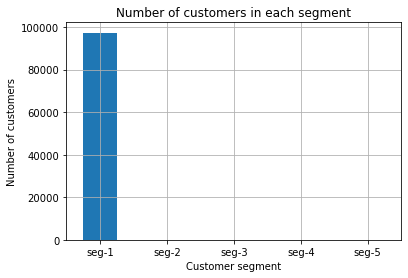

Segments of customers are ordered in ascending order of sales revenue. i.e.
Seg-1 represents customers generating lowest sales revenue and Seg-5 represent highest sales revenue.


seg-1    97349
seg-2       56
seg-3        5
seg-4        0
seg-5        1
Name: customer_segment, dtype: int64

In [228]:
ord_status = ['delivered','invoiced','shipped','approved']
cust_rev = ecom.loc[ecom.order_status.isin(ord_status),
                    ['order_id','order_status','order_purchase_timestamp','payment_sequential',
                     'payment_value','customer_id']].drop_duplicates()
cust_rev = cust_rev.groupby(by='customer_id').agg({'payment_value':'sum'}) \
                   .rename(columns={'payment_value':'total_purchase'}).reset_index() \
                   .sort_values(by='total_purchase', ascending=False)
cust_rev['customer_segment'] = pd.cut(cust_rev.total_purchase, bins=5,
                                      labels=['seg-1','seg-2','seg-3','seg-4','seg-5'])
cust_rev.customer_segment.value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel('Customer segment')
plt.ylabel('Number of customers')
plt.title('Number of customers in each segment')
plt.grid()
plt.show()
print('''Segments of customers are ordered in ascending order of sales revenue. i.e.
Seg-1 represents customers generating lowest sales revenue and Seg-5 represent highest sales revenue.''')
cust_rev.customer_segment.value_counts().sort_index()

### 2.b) Divide sellers into groups based on revenue generated

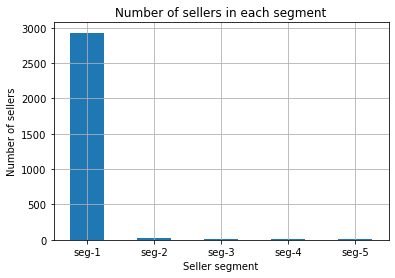

Segments of sellers are ordered in ascending order of sales revenue. i.e.
Seg-1 represents sellers generating lowest sales revenue and Seg-5 represent highest sales revenue.


seg-1    2931
seg-2      30
seg-3       8
seg-4       6
seg-5       5
Name: seller_segment, dtype: int64

In [229]:
seller_rev = ecom.loc[ecom.order_status.isin(ord_status),
                    ['order_id','order_status','order_purchase_timestamp','payment_sequential',
                     'payment_value','seller_id']].drop_duplicates()
seller_rev = seller_rev.groupby(by='seller_id').agg({'payment_value':'sum'}) \
                   .rename(columns={'payment_value':'total_sales'}).reset_index() \
                   .sort_values(by='total_sales', ascending=False)
seller_rev['seller_segment'] = pd.cut(seller_rev.total_sales, bins=5,
                                      labels=['seg-1','seg-2','seg-3','seg-4','seg-5'])
seller_rev.seller_segment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Seller segment')
plt.ylabel('Number of sellers')
plt.title('Number of sellers in each segment')
plt.grid()
plt.show()
print('''Segments of sellers are ordered in ascending order of sales revenue. i.e.
Seg-1 represents sellers generating lowest sales revenue and Seg-5 represent highest sales revenue.''')
seller_rev.seller_segment.value_counts()

### 3) Cross selling (Top 10 combination of Products selling together)

In [230]:
prod_in_order = []
comb_2 = []  # to store combination of 2 products per order 
comb_3 = []  # to store combination of 3 products per order 

# series containing sets of product ids per order
products_order = ecom.groupby(by='order_id').apply(lambda x: set(x.product_id))
# following loop creates a list of sets containing product id for orders where more than 1 product was ordered
for prod in products_order:
    if len(prod) > 1:
        prod_in_order.append(prod)
# following loop creates list of 2 & 3 combinations of products bought together
for i in prod_in_order:
    if len(i)==2:
        temp_list = list(i)
        temp_list.sort()
        comb_2.append(temp_list)
    elif len(i) > 2:
        for x in itertools.combinations(i,2):
            temp_list = list(x)
            temp_list.sort()
            comb_2.append(temp_list)
        for x in itertools.combinations(i,3):
            temp_list = list(x)
            temp_list.sort()
            comb_3.append(temp_list)

# funtion to count freq of combinations of products bought together
def comb_freq(comb):
    freq = {}
    s = 1
    for i in range(len(comb)):
        for k in range(0, i):
            if comb[k] == comb[i]:  # checking if the i-th product has appeared before
                break
            elif k == i-1:
                if i < len(comb)-1:
                    for j in range(i+1, len(comb)):
                        if comb[i] == comb[j]:
                            s += 1
                freq[tuple(comb[i])] = s
                s = 1
    return freq

comb_2_freq = comb_freq(comb_2)
comb_3_freq = comb_freq(comb_3)
print('Top 10 combination of 2 products bought together :-','\n')
print(pd.Series(comb_2_freq).sort_values(ascending=False).head(10))
print('\n')
print('Top 10 combination of 3 products bought together :-','\n')
print(pd.Series(comb_3_freq).sort_values(ascending=False).head(10))

Top 10 combination of 2 products bought together :- 

36f60d45225e60c7da4558b070ce4b60  e53e557d5a159f5aa2c5e995dfdf244b    34
35afc973633aaeb6b877ff57b2793310  99a4788cb24856965c36a24e339b6058    29
4fcb3d9a5f4871e8362dfedbdb02b064  f4f67ccaece962d013a4e1d7dc3a61f7    17
36f60d45225e60c7da4558b070ce4b60  3f14d740544f37ece8a9e7bc8349797e    12
389d119b48cf3043d311335e499d9c6b  422879e10f46682990de24d770e7f83d    11
                                  53759a2ecddad2bb87a079a1f1519f73     9
368c6c730842d78016ad823897a372db  53759a2ecddad2bb87a079a1f1519f73     8
18486698933fbb64af6c0a255f7dd64c  dbb67791e405873b259e4656bf971246     7
422879e10f46682990de24d770e7f83d  53759a2ecddad2bb87a079a1f1519f73     7
060cb19345d90064d1015407193c233d  98d61056e0568ba048e5d78038790e77     6
dtype: int64


Top 10 combination of 3 products bought together :- 

55bfa0307d7a46bed72c492259921231  b9900407a55cb2b306ae612415c3340e  e2cac69b319c0f8a21dbf04b925121bf    3
35afc973633aaeb6b877ff57b2793310  99a4788

### 4) Payment behaviour of customers

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17648\330205058.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(y_ticks)


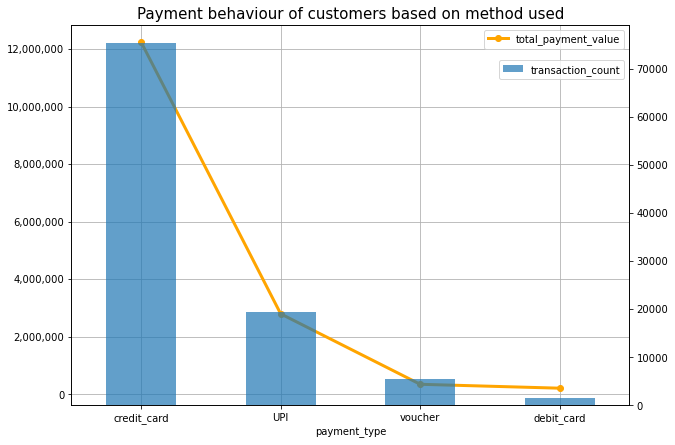

,total_payment_value,transaction_count
payment_type,,
credit_card,12239458.61,75289
UPI,2796085.28,19372
voucher,347574.21,5574
debit_card,211673.20,1511


In [231]:
ord_status = ['delivered','invoiced','shipped','approved']
pay_behav = ecom.loc[ecom.order_status.isin(ord_status),
                     ['order_id','order_status','payment_sequential',
                      'payment_value','payment_type']].drop_duplicates()
pay_behav = pay_behav.groupby(by='payment_type').agg({'payment_value':['sum','count']}).droplevel(0, axis=1) \
                     .rename(columns={'sum':'total_payment_value', 'count':'transaction_count'}) \
                     .sort_values(by='transaction_count', ascending=False)

fig, axes = plt.subplots(1,1, figsize=(10,7))
ax1 = axes.twinx()

pay_behav.plot(kind='line', y='total_payment_value', marker='o', color='orange', linewidth=3, ax=axes)
y_ticks = [f'{y:,.0f}' for y in axes.get_yticks()]
axes.set_yticklabels(y_ticks)
axes.grid(True)

pay_behav.plot(kind='bar', y='transaction_count', alpha=0.7, ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0.92))

plt.title('Payment behaviour of customers based on method used', fontsize=15)
plt.show()
pay_behav

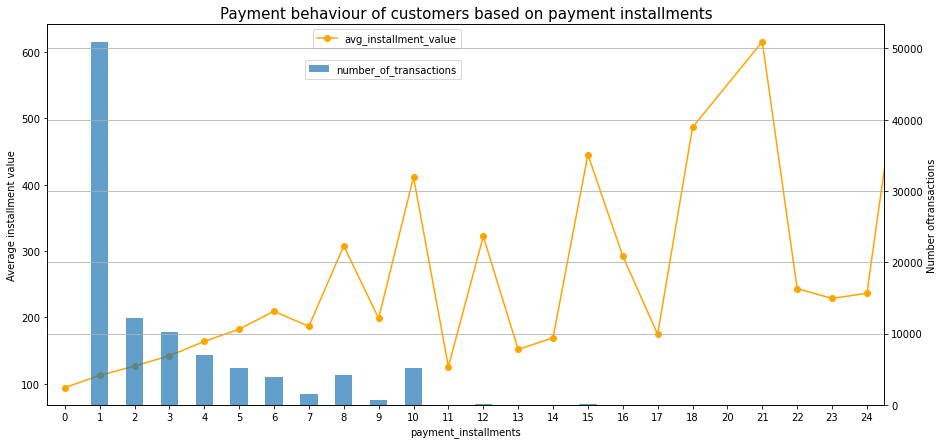

In [232]:
ord_status = ['delivered','invoiced','shipped','approved']
pay_behav1 = ecom.loc[ecom.order_status.isin(ord_status),
                     ['order_id','order_status','payment_installments',
                      'payment_value','payment_type']].drop_duplicates()
pay_behav1 = pay_behav1.groupby(by='payment_installments').agg({'payment_value':['mean','count']}) \
                       .droplevel(0, axis=1) \
                       .rename(columns={'mean':'avg_installment_value','count':'number_of_transactions'})
fig , axes = plt.subplots(1,1, figsize=(15,7))
ax1 = axes.twinx()

pay_behav1.plot(kind='line', y='avg_installment_value', marker='o', color='orange', ax=axes)
axes.set_xticks(pay_behav1.index)
axes.legend(bbox_to_anchor=(0.5, 1))
axes.set_ylabel('Average installment value')

pay_behav1.plot(kind='bar', y='number_of_transactions', ax=ax1, alpha=0.7)
ax1.legend(bbox_to_anchor=(0.5, 0.92))
ax1.set_ylabel('Number oftransactions')

plt.title('Payment behaviour of customers based on payment installments', fontsize=15)
plt.grid()
plt.show()

### 5.a) (i) Top 10 Categories with maximum ratings

In [233]:
ord_status = ['delivered','invoiced','shipped','approved']
cat_ratings = ecom.loc[ecom.order_status.isin(ord_status),
                       ['order_id','order_status','product_category_name','review_score']].drop_duplicates()

cat_ratings.groupby(by='product_category_name').agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
           .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
           .sort_values(by='average_rating', ascending=False).head(10)

,average_rating,review_counts
product_category_name,,
Fashion_Childrens_Clothes,5.000000,7
Cds_Dvds_Musicals,4.666667,12
Books_General_Interest,4.514970,501
Food_Drink,4.413333,225
Books_Imported,4.384615,52
Books_Technical,4.382239,259
Costruction_Tools_Tools,4.371134,97
Fashion_Sport,4.360000,25
Luggage_Accessories,4.343750,1024


### 5.a) (ii) Bottom 10 Categories with minimum ratings

In [234]:
cat_ratings.groupby(by='product_category_name').agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
           .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
           .sort_values(by='average_rating', ascending=True).head(10)

,average_rating,review_counts
product_category_name,,
Security_And_Services,2.500000,2
Office_Furniture,3.612954,1266
Home_Comfort_2,3.708333,24
Fashion_Male_Clothing,3.715596,109
Fashio_Female_Clothing,3.769231,39
Furniture_Mattress_And_Upholstery,3.815789,38
Audio,3.819484,349
Diapers_And_Hygiene,3.846154,26
Home_Confort,3.852130,399


### 5.b) (i) Top 10 Products with maximum ratings

In [235]:
ord_status = ['delivered','invoiced','shipped','approved']
prod_ratings = ecom.loc[ecom.order_status.isin(ord_status),
                       ['order_id','order_status','product_id','review_score']].drop_duplicates()

prod_ratings.groupby(by='product_id').agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
            .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
            .sort_values(by=['average_rating','review_counts'], ascending=False).head(10)

,average_rating,review_counts
product_id,,
2722b7e5f68e776d18fe901638034e54,5.0,13
4c8b28305f570899b6ded964ddd234a9,5.0,11
59c1840441f4df065f52760bf51a8442,5.0,11
8173ca41cdb176462f9ae79821a48404,5.0,11
8b6ed41158b194711f83b8da92757544,5.0,11
83aae8023b8feda53259f63e0ec06390,5.0,10
a7d756e8f7c4b7e5b679e248a57d91ec,5.0,10
b9ee7519d0187d2389af62ba6c612963,5.0,10
f5d8f4fbc70ca2a0038b9a0010ed5cb0,5.0,10


### 5.b) (ii) 10 Products with minimum ratings

In [236]:
prod_ratings.groupby(by='product_id').agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
            .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
            .sort_values(by=['average_rating','review_counts'], ascending=[True,False]).head(10)

,average_rating,review_counts
product_id,,
fb29f48bfea41db52e349454f433340e,1.0,8
ffedbd68fa6f44e788ff6c2db8094715,1.0,5
638a9114d65182d28b1cf8a99e72d90e,1.0,4
e6b6e72a0e6be244a69261788f086429,1.0,4
e7be84ea9462aac5e2b0b08eb35ba7f1,1.0,4
37318ccebb2ced72bd1b548b55ab4e31,1.0,3
3904e66405ea8ec8d104534682a38c6d,1.0,3
49eaaa38ac3df51ca790372b47b99604,1.0,3
613221d716be89edd3bb436c8060cd05,1.0,3


### 5.c) (i) Average rating by location

In [237]:
ord_status = ['delivered','invoiced','shipped','approved']
loc_ratings = ecom.loc[ecom.order_status.isin(ord_status),
                       ['order_id','order_status','customer_state','review_score']].drop_duplicates()

loc_ratings.groupby(by='customer_state').agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
            .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
            .sort_values(by=['average_rating','review_counts'], ascending=False)

,average_rating,review_counts
customer_state,,
Goa,4.777778,9
Punjab,4.224215,669
Rajasthan,4.202008,797
Haryana,4.195167,2152
Tamil Nadu,4.193193,2086
Uttar Pradesh,4.187438,1003
Kerala,4.182302,1503
Maharashtra,4.162779,1972
Orissa,4.156958,618


### 5.c) (ii) Average rating by seller

In [238]:
ord_status = ['delivered','invoiced','shipped','approved']
seller_ratings = ecom.loc[ecom.order_status.isin(ord_status),
                       ['order_id','order_status','seller_id','review_score']].drop_duplicates()

seller_ratings.groupby(by='seller_id').agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
            .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
            .sort_values(by=['average_rating','review_counts'], ascending=False)

,average_rating,review_counts
seller_id,,
48efc9d94a9834137efd9ea76b065a38,5.0,33
2addf05f476d0637864454e93ba673d5,5.0,12
b2eecf5ea250510da76590ca79d60e5d,5.0,9
293dee954235e4e4e43f129313625ebe,5.0,8
297d5eccd19fa9a83b2630071ff105e4,5.0,8
...,...,...
e6ffc9ac6a7adc9d16a1cfc2286dd546,1.0,1
f114dca2828bf718548db175ebe2cfcd,1.0,1
f524ad65d7e0f1daab730ef2d2e86196,1.0,1


### 5.c) (iii) Average rating by product

In [239]:
ord_status = ['delivered','invoiced','shipped','approved']
product_ratings = ecom.loc[ecom.order_status.isin(ord_status),
                       ['order_id','order_status','product_id','review_score']].drop_duplicates()

product_ratings.groupby(by='product_id').agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
            .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
            .sort_values(by=['average_rating','review_counts'], ascending=False)

,average_rating,review_counts
product_id,,
2722b7e5f68e776d18fe901638034e54,5.0,13
4c8b28305f570899b6ded964ddd234a9,5.0,11
59c1840441f4df065f52760bf51a8442,5.0,11
8173ca41cdb176462f9ae79821a48404,5.0,11
8b6ed41158b194711f83b8da92757544,5.0,11
...,...,...
ffa1ce7f2a287ca5e369673bd77d43de,1.0,1
ffbc83054b3741a8d67fc59d9cf9d42d,1.0,1
ffbfa9e143fda4420454d0f4e88a3cd5,1.0,1


### 5.c) (iv) Average rating by category

In [240]:
ord_status = ['delivered','invoiced','shipped','approved']
category_ratings = ecom.loc[ecom.order_status.isin(ord_status),
                       ['order_id','order_status','product_category_name','review_score']].drop_duplicates()

category_ratings.groupby(by='product_category_name').agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
            .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
            .sort_values(by=['average_rating','review_counts'], ascending=False)

,average_rating,review_counts
product_category_name,,
Fashion_Childrens_Clothes,5.000000,7
Cds_Dvds_Musicals,4.666667,12
Books_General_Interest,4.514970,501
Food_Drink,4.413333,225
Books_Imported,4.384615,52
Books_Technical,4.382239,259
Costruction_Tools_Tools,4.371134,97
Fashion_Sport,4.360000,25
Luggage_Accessories,4.343750,1024


### 5.c) (v) Average rating by month

In [241]:
ord_status = ['delivered','invoiced','shipped','approved']
month_ratings = ecom.loc[ecom.order_status.isin(ord_status),
                       ['order_id','order_status','order_purchase_timestamp','review_score']].drop_duplicates()

month_ratings.groupby(by = month_ratings.order_purchase_timestamp.dt.month) \
                         .agg({'review_score':['mean','count']}).droplevel(0, axis=1) \
                         .rename(columns={'mean':'average_rating', 'count':'review_counts'}) \
                         .rename_axis('month') \
                         .sort_values(by=['average_rating','review_counts'], ascending=False)

,average_rating,review_counts
month,,
8,4.274300,10638
7,4.251453,10149
6,4.240163,9302
9,4.217132,4191
5,4.193545,10411
10,4.143750,4800
4,4.133672,9239
1,4.066414,7920
12,4.038116,5562
